<a href="https://colab.research.google.com/github/amrutha-angadi08/Guvi-Projects/blob/main/project_chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import io

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train-chennai-sale.csv']))
print(df)

      PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**DATA CLEANING PROCESS**

In [ ]:
# Removing all the null values
df.dropna(inplace=True)
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the column names in lowercase letters
df.columns = df.columns.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in area column names in lowercase letters
df.area = df.area.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting the spelling mistakes in area columns
df.area = df.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in sale_cond column names in lowercase letters
df.sale_cond = df.sale_cond.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        Yes  ...        AllPub   
1            1.0       5     abnormal         No  ...        AllPub   
2            1.0       3     abnormal        Yes  ...           ELO   
3            2.0       5       family         No  ...       NoSewr    
4            1.0       3     abnormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         No  ...           ELO   
7105         2.0       5       family        Yes  ...        NoSeWa   
7106         1.0       4  normal sale         No  ...        NoSeWa   
7107         1.0       2      partial        Yes  ...           ELO   
7108         2.0       5      partial        Yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting the spelling mistakes in sale_cond columns
df.sale_cond = df.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})
df


prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        Yes  ...        AllPub   
1            1.0       5     abnormal         No  ...        AllPub   
2            1.0       3     abnormal        Yes  ...           ELO   
3            2.0       5       family         No  ...       NoSewr    
4            1.0       3     abnormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         No  ...           ELO   
7105         2.0       5       family        Yes  ...        NoSeWa   
7106         1.0       4  normal sale         No  ...        NoSeWa   
7107         1.0       2      partial        Yes  ...           ELO   
7108         2.0       5      partial        Yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in park_facil column names in lowercase letters
df.park_facil = df.park_facil.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        AllPub   
1            1.0       5     abnormal         no  ...        AllPub   
2            1.0       3     abnormal        yes  ...           ELO   
3            2.0       5       family         no  ...       NoSewr    
4            1.0       3     abnormal        yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           ELO   
7105         2.0       5       family        yes  ...        NoSeWa   
7106         1.0       4  normal sale         no  ...        NoSeWa   
7107         1.0       2      partial        yes  ...           ELO   
7108         2.0       5      partial        yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting the spelling mistakes in park_facil columns
df.park_facil = df.park_facil.replace({'noo':'no'})
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        AllPub   
1            1.0       5     abnormal         no  ...        AllPub   
2            1.0       3     abnormal        yes  ...           ELO   
3            2.0       5       family         no  ...       NoSewr    
4            1.0       3     abnormal        yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           ELO   
7105         2.0       5       family        yes  ...        NoSeWa   
7106         1.0       4  normal sale         no  ...        NoSeWa   
7107         1.0       2      partial        yes  ...           ELO   
7108         2.0       5      partial        yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in buildtype column names in lowercase letters
df.buildtype = df.buildtype.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        AllPub   
1            1.0       5     abnormal         no  ...        AllPub   
2            1.0       3     abnormal        yes  ...           ELO   
3            2.0       5       family         no  ...       NoSewr    
4            1.0       3     abnormal        yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           ELO   
7105         2.0       5       family        yes  ...        NoSeWa   
7106         1.0       4  normal sale         no  ...        NoSeWa   
7107         1.0       2      partial        yes  ...           ELO   
7108         2.0       5      partial        yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting the spelling mistakes in buildtype columns
df.buildtype = df.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        AllPub   
1            1.0       5     abnormal         no  ...        AllPub   
2            1.0       3     abnormal        yes  ...           ELO   
3            2.0       5       family         no  ...       NoSewr    
4            1.0       3     abnormal        yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           ELO   
7105         2.0       5       family        yes  ...        NoSeWa   
7106         1.0       4  normal sale         no  ...        NoSeWa   
7107         1.0       2      partial        yes  ...           ELO   
7108         2.0       5      partial        yes  ...           ELO   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in utility_avail column names in lowercase letters
df.utility_avail = df.utility_avail.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        allpub   
1            1.0       5     abnormal         no  ...        allpub   
2            1.0       3     abnormal        yes  ...           elo   
3            2.0       5       family         no  ...       nosewr    
4            1.0       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           elo   
7105         2.0       5       family        yes  ...        nosewa   
7106         1.0       4  normal sale         no  ...        nosewa   
7107         1.0       2      partial        yes  ...           elo   
7108         2.0       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting the spelling mistakes in utility_avail columns
df.utility_avail = df.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        allpub   
1            1.0       5     abnormal         no  ...        allpub   
2            1.0       3     abnormal        yes  ...           elo   
3            2.0       5       family         no  ...       nosewr    
4            1.0       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           elo   
7105         2.0       5       family        yes  ...        nosewa   
7106         1.0       4  normal sale         no  ...        nosewa   
7107         1.0       2      partial        yes  ...           elo   
7108         2.0       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in street column names in lowercase letters
df.street = df.street.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        allpub   
1            1.0       5     abnormal         no  ...        allpub   
2            1.0       3     abnormal        yes  ...           elo   
3            2.0       5       family         no  ...       nosewr    
4            1.0       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           elo   
7105         2.0       5       family        yes  ...        nosewa   
7106         1.0       4  normal sale         no  ...        nosewa   
7107         1.0       2      partial        yes  ...           elo   
7108         2.0       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         paved      A      4.0         3.9         4.9       4.330   380000   
1        gravel     RH      4.9         4.2         2.5       3.765   760122   
2        gravel     RL      4.1         3.8         2.2       3.090   421094   
3         paved      I      4.7         3.9         3.6       4.010   356321   
4        gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  no access     RM      3.0         2.2         2.4       2.520   208767   
7105  no access     RH      3.6         4.5         3.3       3.920   346191   
7106     gravel      I      4.3         4.2         2.9       3.840   317354   
7107      paved     RL      4.6         3.8         4.1       4.160   425350   
7108      paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
#Correcting the spelling mistakes in street columns
df.street = df.street.replace({'pavd':'paved', 
                              'noaccess':'no access'})
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        allpub   
1            1.0       5     abnormal         no  ...        allpub   
2            1.0       3     abnormal        yes  ...           elo   
3            2.0       5       family         no  ...       nosewr    
4            1.0       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           elo   
7105         2.0       5       family        yes  ...        nosewa   
7106         1.0       4  normal sale         no  ...        nosewa   
7107         1.0       2      partial        yes  ...           elo   
7108         2.0       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         paved      A      4.0         3.9         4.9       4.330   380000   
1        gravel     RH      4.9         4.2         2.5       3.765   760122   
2        gravel     RL      4.1         3.8         2.2       3.090   421094   
3         paved      I      4.7         3.9         3.6       4.010   356321   
4        gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  no access     RM      3.0         2.2         2.4       2.520   208767   
7105  no access     RH      3.6         4.5         3.3       3.920   346191   
7106     gravel      I      4.3         4.2         2.9       3.840   317354   
7107      paved     RL      4.6         3.8         4.1       4.160   425350   
7108      paved      I      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Renaming all the string in mzzone column names in lowercase letters
df.mzzone = df.mzzone.str.lower()
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131        1.0   
1     P09411  anna nagar      1986  19-12-2006             26        2.0   
2     P01812       adyar       909  04-02-2012             70        1.0   
3     P05346   velachery      1855  13-03-2010             14        3.0   
4     P06210  karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51        1.0   
7105  P10000   velachery      1897  08-04-2004             52        3.0   
7106  P09594   velachery      1614  25-08-2006            152        2.0   
7107  P06508  karapakkam       787  03-08-2009             40        1.0   
7108  P09794   velachery      1896  13-07-2005            156        3.0   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0            1.0       3     abnormal        yes  ...        allpub   
1            1.0       5     abnormal         no  ...        allpub   
2            1.0       3     abnormal        yes  ...           elo   
3            2.0       5       family         no  ...       nosewr    
4            1.0       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      adjland         no  ...           elo   
7105         2.0       5       family        yes  ...        nosewa   
7106         1.0       4  normal sale         no  ...        nosewa   
7107         1.0       2      partial        yes  ...           elo   
7108         2.0       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         paved      a      4.0         3.9         4.9       4.330   380000   
1        gravel     rh      4.9         4.2         2.5       3.765   760122   
2        gravel     rl      4.1         3.8         2.2       3.090   421094   
3         paved      i      4.7         3.9         3.6       4.010   356321   
4        gravel      c      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  no access     rm      3.0         2.2         2.4       2.520   208767   
7105  no access     rh      3.6         4.5         3.3       3.920   346191   
7106     gravel      i      4.3         4.2         2.9       3.840   317354   
7107      paved     rl      4.6         3.8         4.1       4.160   425350   
7108      paved      i      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Fixing the correct Data Type of columns
df.n_bedroom = df.n_bedroom.astype(int)
df.n_bathroom = df.n_bathroom.astype(int)
df

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004  04-05-2011            131          1   
1     P09411  anna nagar      1986  19-12-2006             26          2   
2     P01812       adyar       909  04-02-2012             70          1   
3     P05346   velachery      1855  13-03-2010             14          3   
4     P06210  karapakkam      1226  05-10-2009             84          1   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  karapakkam       598  03-01-2011             51          1   
7105  P10000   velachery      1897  08-04-2004             52          3   
7106  P09594   velachery      1614  25-08-2006            152          2   
7107  P06508  karapakkam       787  03-08-2009             40          1   
7108  P09794   velachery      1896  13-07-2005            156          3   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0              1       3     abnormal        yes  ...        allpub   
1              1       5     abnormal         no  ...        allpub   
2              1       3     abnormal        yes  ...           elo   
3              2       5       family         no  ...       nosewr    
4              1       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104           1       2      adjland         no  ...           elo   
7105           2       5       family        yes  ...        nosewa   
7106           1       4  normal sale         no  ...        nosewa   
7107           1       2      partial        yes  ...           elo   
7108           2       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         paved      a      4.0         3.9         4.9       4.330   380000   
1        gravel     rh      4.9         4.2         2.5       3.765   760122   
2        gravel     rl      4.1         3.8         2.2       3.090   421094   
3         paved      i      4.7         3.9         3.6       4.010   356321   
4        gravel      c      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  no access     rm      3.0         2.2         2.4       2.520   208767   
7105  no access     rh      3.6         4.5         3.3       3.920   346191   
7106     gravel      i      4.3         4.2         2.9       3.840   317354   
7107      paved     rl      4.6         3.8         4.1       4.160   425350   
7108      paved      i      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Correcting Date columnd from object to daterime format
df.date_sale = pd.to_datetime(df.date_sale, format='%d-%m-%Y')
df.date_build = pd.to_datetime(df.date_build, format='%d-%m-%Y')
df

prt_id        area  int_sqft  date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004 2011-05-04            131          1   
1     P09411  anna nagar      1986 2006-12-19             26          2   
2     P01812       adyar       909 2012-02-04             70          1   
3     P05346   velachery      1855 2010-03-13             14          3   
4     P06210  karapakkam      1226 2009-10-05             84          1   
...      ...         ...       ...        ...            ...        ...   
7104  P03834  karapakkam       598 2011-01-03             51          1   
7105  P10000   velachery      1897 2004-04-08             52          3   
7106  P09594   velachery      1614 2006-08-25            152          2   
7107  P06508  karapakkam       787 2009-08-03             40          1   
7108  P09794   velachery      1896 2005-07-13            156          3   

      n_bathroom  n_room    sale_cond park_facil  ... utility_avail  \
0              1       3     abnormal        yes  ...        allpub   
1              1       5     abnormal         no  ...        allpub   
2              1       3     abnormal        yes  ...           elo   
3              2       5       family         no  ...       nosewr    
4              1       3     abnormal        yes  ...        allpub   
...          ...     ...          ...        ...  ...           ...   
7104           1       2      adjland         no  ...           elo   
7105           2       5       family        yes  ...        nosewa   
7106           1       4  normal sale         no  ...        nosewa   
7107           1       2      partial        yes  ...           elo   
7108           2       5      partial        yes  ...           elo   

         street mzzone qs_rooms qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0         paved      a      4.0         3.9         4.9       4.330   380000   
1        gravel     rh      4.9         4.2         2.5       3.765   760122   
2        gravel     rl      4.1         3.8         2.2       3.090   421094   
3         paved      i      4.7         3.9         3.6       4.010   356321   
4        gravel      c      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  no access     rm      3.0         2.2         2.4       2.520   208767   
7105  no access     rh      3.6         4.5         3.3       3.920   346191   
7106     gravel      i      4.3         4.2         2.9       3.840   317354   
7107      paved     rl      4.6         3.8         4.1       4.160   425350   
7108      paved      i      3.1         3.5         4.3       3.640   349177   

      commis  sales_price  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7056 rows x 22 columns]

In [ ]:
# Creating property_age column which deternine how old the property id
df['property_age'] = pd.DatetimeIndex(df.date_sale).year - pd.DatetimeIndex(df.date_build).year
df

prt_id        area  int_sqft  date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004 2011-05-04            131          1   
1     P09411  anna nagar      1986 2006-12-19             26          2   
2     P01812       adyar       909 2012-02-04             70          1   
3     P05346   velachery      1855 2010-03-13             14          3   
4     P06210  karapakkam      1226 2009-10-05             84          1   
...      ...         ...       ...        ...            ...        ...   
7104  P03834  karapakkam       598 2011-01-03             51          1   
7105  P10000   velachery      1897 2004-04-08             52          3   
7106  P09594   velachery      1614 2006-08-25            152          2   
7107  P06508  karapakkam       787 2009-08-03             40          1   
7108  P09794   velachery      1896 2005-07-13            156          3   

      n_bathroom  n_room    sale_cond park_facil  ...     street mzzone  \
0              1       3     abnormal        yes  ...      paved      a   
1              1       5     abnormal         no  ...     gravel     rh   
2              1       3     abnormal        yes  ...     gravel     rl   
3              2       5       family         no  ...      paved      i   
4              1       3     abnormal        yes  ...     gravel      c   
...          ...     ...          ...        ...  ...        ...    ...   
7104           1       2      adjland         no  ...  no access     rm   
7105           2       5       family        yes  ...  no access     rh   
7106           1       4  normal sale         no  ...     gravel      i   
7107           1       2      partial        yes  ...      paved     rl   
7108           2       5      partial        yes  ...      paved      i   

     qs_rooms qs_bathroom qs_bedroom  qs_overall  reg_fee  commis  \
0         4.0         3.9        4.9       4.330   380000  144400   
1         4.9         4.2        2.5       3.765   760122  304049   
2         4.1         3.8        2.2       3.090   421094   92114   
3         4.7         3.9        3.6       4.010   356321   77042   
4         3.0         2.5        4.1       3.290   237000   74063   
...       ...         ...        ...         ...      ...     ...   
7104      3.0         2.2        2.4       2.520   208767  107060   
7105      3.6         4.5        3.3       3.920   346191  205551   
7106      4.3         4.2        2.9       3.840   317354  167028   
7107      4.6         3.8        4.1       4.160   425350  119098   
7108      3.1         3.5        4.3       3.640   349177   79812   

      sales_price  property_age  
0         7600000            44  
1        21717770            11  
2        13159200            20  
3         9630290            22  
4         7406250            30  
...           ...           ...  
7104      5353000            49  
7105     10818480             9  
7106      8351410            28  
7107      8507000            32  
7108      9976480            44  

[7056 rows x 23 columns]

In [ ]:
# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
df['total_price'] = pd.DataFrame(df.reg_fee	+ df.commis	+ df.sales_price)
df

prt_id        area  int_sqft  date_sale  dist_mainroad  n_bedroom  \
0     P03210  karapakkam      1004 2011-05-04            131          1   
1     P09411  anna nagar      1986 2006-12-19             26          2   
2     P01812       adyar       909 2012-02-04             70          1   
3     P05346   velachery      1855 2010-03-13             14          3   
4     P06210  karapakkam      1226 2009-10-05             84          1   
...      ...         ...       ...        ...            ...        ...   
7104  P03834  karapakkam       598 2011-01-03             51          1   
7105  P10000   velachery      1897 2004-04-08             52          3   
7106  P09594   velachery      1614 2006-08-25            152          2   
7107  P06508  karapakkam       787 2009-08-03             40          1   
7108  P09794   velachery      1896 2005-07-13            156          3   

      n_bathroom  n_room    sale_cond park_facil  ... mzzone qs_rooms  \
0              1       3     abnormal        yes  ...      a      4.0   
1              1       5     abnormal         no  ...     rh      4.9   
2              1       3     abnormal        yes  ...     rl      4.1   
3              2       5       family         no  ...      i      4.7   
4              1       3     abnormal        yes  ...      c      3.0   
...          ...     ...          ...        ...  ...    ...      ...   
7104           1       2      adjland         no  ...     rm      3.0   
7105           2       5       family        yes  ...     rh      3.6   
7106           1       4  normal sale         no  ...      i      4.3   
7107           1       2      partial        yes  ...     rl      4.6   
7108           2       5      partial        yes  ...      i      3.1   

     qs_bathroom qs_bedroom qs_overall  reg_fee  commis  sales_price  \
0            3.9        4.9      4.330   380000  144400      7600000   
1            4.2        2.5      3.765   760122  304049     21717770   
2            3.8        2.2      3.090   421094   92114     13159200   
3            3.9        3.6      4.010   356321   77042      9630290   
4            2.5        4.1      3.290   237000   74063      7406250   
...          ...        ...        ...      ...     ...          ...   
7104         2.2        2.4      2.520   208767  107060      5353000   
7105         4.5        3.3      3.920   346191  205551     10818480   
7106         4.2        2.9      3.840   317354  167028      8351410   
7107         3.8        4.1      4.160   425350  119098      8507000   
7108         3.5        4.3      3.640   349177   79812      9976480   

      property_age  total_price  
0               44      8124400  
1               11     22781941  
2               20     13672408  
3               22     10063653  
4               30      7717313  
...            ...          ...  
7104            49      5668827  
7105             9     11370222  
7106            28      8835792  
7107            32      9051448  
7108            44     10405469  

[7056 rows x 24 columns]

In [ ]:
# Rearranging the columns of dataframe 
df = df.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])
df

prt_id        area    sale_cond park_facil   buildtype utility_avail  \
0     P03210  karapakkam     abnormal        yes  commercial        allpub   
1     P09411  anna nagar     abnormal         no  commercial        allpub   
2     P01812       adyar     abnormal        yes  commercial           elo   
3     P05346   velachery       family         no       other       nosewr    
4     P06210  karapakkam     abnormal        yes       other        allpub   
...      ...         ...          ...        ...         ...           ...   
7104  P03834  karapakkam      adjland         no       other           elo   
7105  P10000   velachery       family        yes       other        nosewa   
7106  P09594   velachery  normal sale         no       house        nosewa   
7107  P06508  karapakkam      partial        yes  commercial           elo   
7108  P09794   velachery      partial        yes       other           elo   

         street mzzone date_build  date_sale  ...  n_bathroom  n_room  \
0         paved      a 1967-05-15 2011-05-04  ...           1       3   
1        gravel     rh 1995-12-22 2006-12-19  ...           1       5   
2        gravel     rl 1992-02-09 2012-02-04  ...           1       3   
3         paved      i 1988-03-18 2010-03-13  ...           2       5   
4        gravel      c 1979-10-13 2009-10-05  ...           1       3   
...         ...    ...        ...        ...  ...         ...     ...   
7104  no access     rm 1962-01-15 2011-01-03  ...           1       2   
7105  no access     rh 1995-04-11 2004-04-08  ...           2       5   
7106     gravel      i 1978-09-01 2006-08-25  ...           1       4   
7107      paved     rl 1977-08-11 2009-08-03  ...           1       2   
7108      paved      i 1961-07-24 2005-07-13  ...           2       5   

      qs_rooms  qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  \
0          4.0          3.9         4.9       4.330   380000  144400   
1          4.9          4.2         2.5       3.765   760122  304049   
2          4.1          3.8         2.2       3.090   421094   92114   
3          4.7          3.9         3.6       4.010   356321   77042   
4          3.0          2.5         4.1       3.290   237000   74063   
...        ...          ...         ...         ...      ...     ...   
7104       3.0          2.2         2.4       2.520   208767  107060   
7105       3.6          4.5         3.3       3.920   346191  205551   
7106       4.3          4.2         2.9       3.840   317354  167028   
7107       4.6          3.8         4.1       4.160   425350  119098   
7108       3.1          3.5         4.3       3.640   349177   79812   

      sales_price  total_price  
0         7600000      8124400  
1        21717770     22781941  
2        13159200     13672408  
3         9630290     10063653  
4         7406250      7717313  
...           ...          ...  
7104      5353000      5668827  
7105     10818480     11370222  
7106      8351410      8835792  
7107      8507000      9051448  
7108      9976480     10405469  

[7056 rows x 24 columns]

In [ ]:
df.head()

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   
3  P05346   velachery    family         no       other       nosewr    paved   
4  P06210  karapakkam  abnormal        yes       other        allpub  gravel   

  mzzone date_build  date_sale  ...  n_bathroom  n_room  qs_rooms  \
0      a 1967-05-15 2011-05-04  ...           1       3       4.0   
1     rh 1995-12-22 2006-12-19  ...           1       5       4.9   
2     rl 1992-02-09 2012-02-04  ...           1       3       4.1   
3      i 1988-03-18 2010-03-13  ...           2       5       4.7   
4      c 1979-10-13 2009-10-05  ...           1       3       3.0   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   
3          3.9         3.6       4.010   356321   77042      9630290   
4          2.5         4.1       3.290   237000   74063      7406250   

   total_price  
0      8124400  
1     22781941  
2     13672408  
3     10063653  
4      7717313  

[5 rows x 24 columns]

# EXPLORATORY DATA ANALYSIS

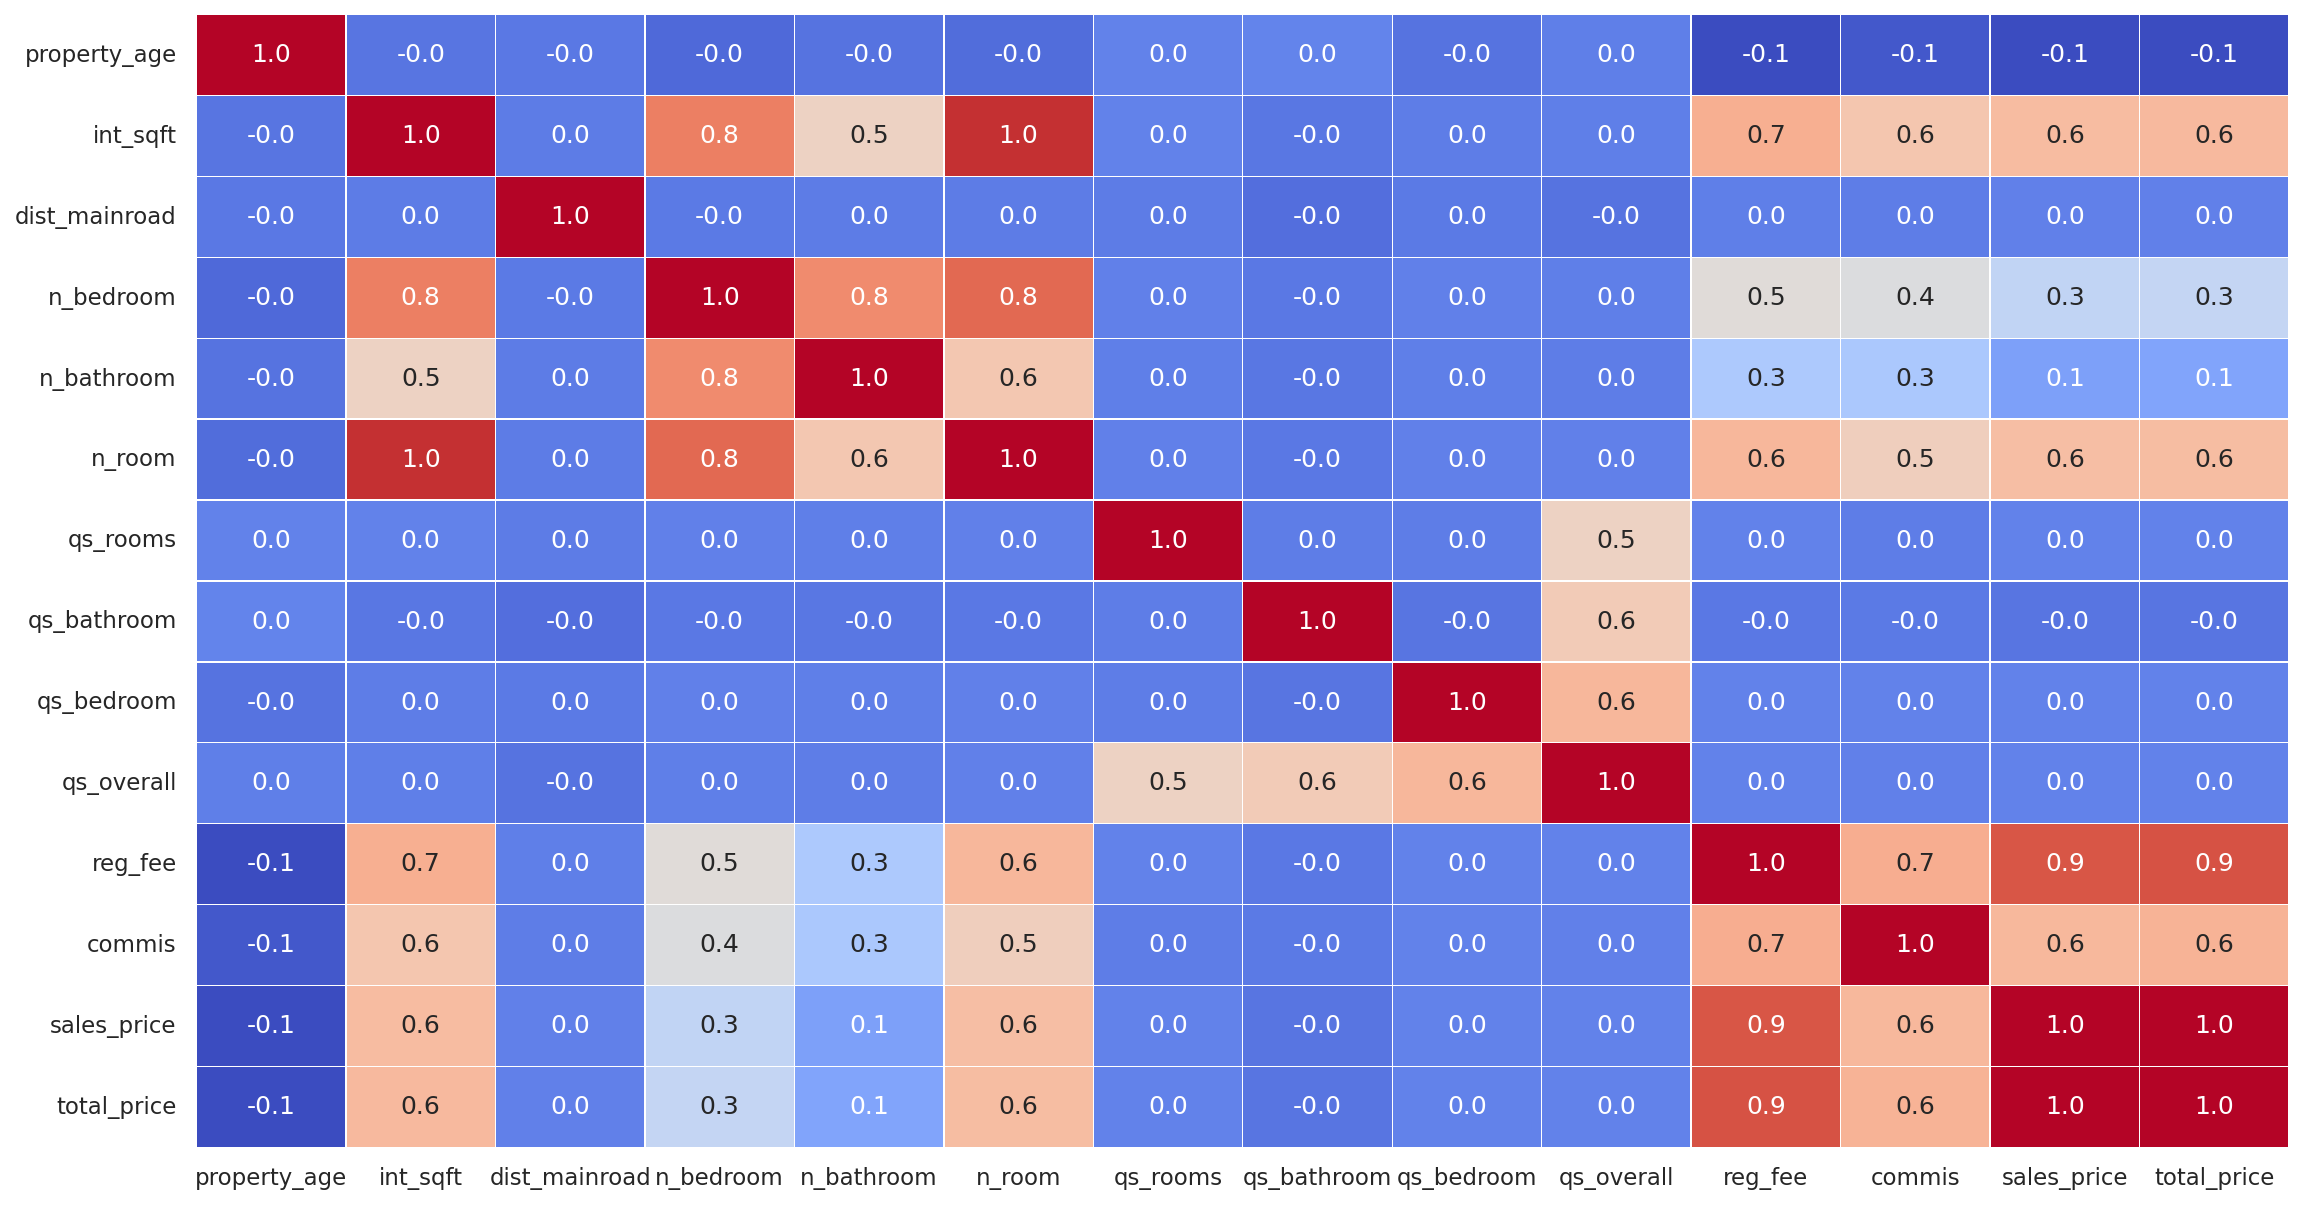

In [ ]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Interpretation:-

Here as we can see that in numerical columns there are some correlation between target and features which are shown in reddish colour.

# Distribution Of Features in Data Columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

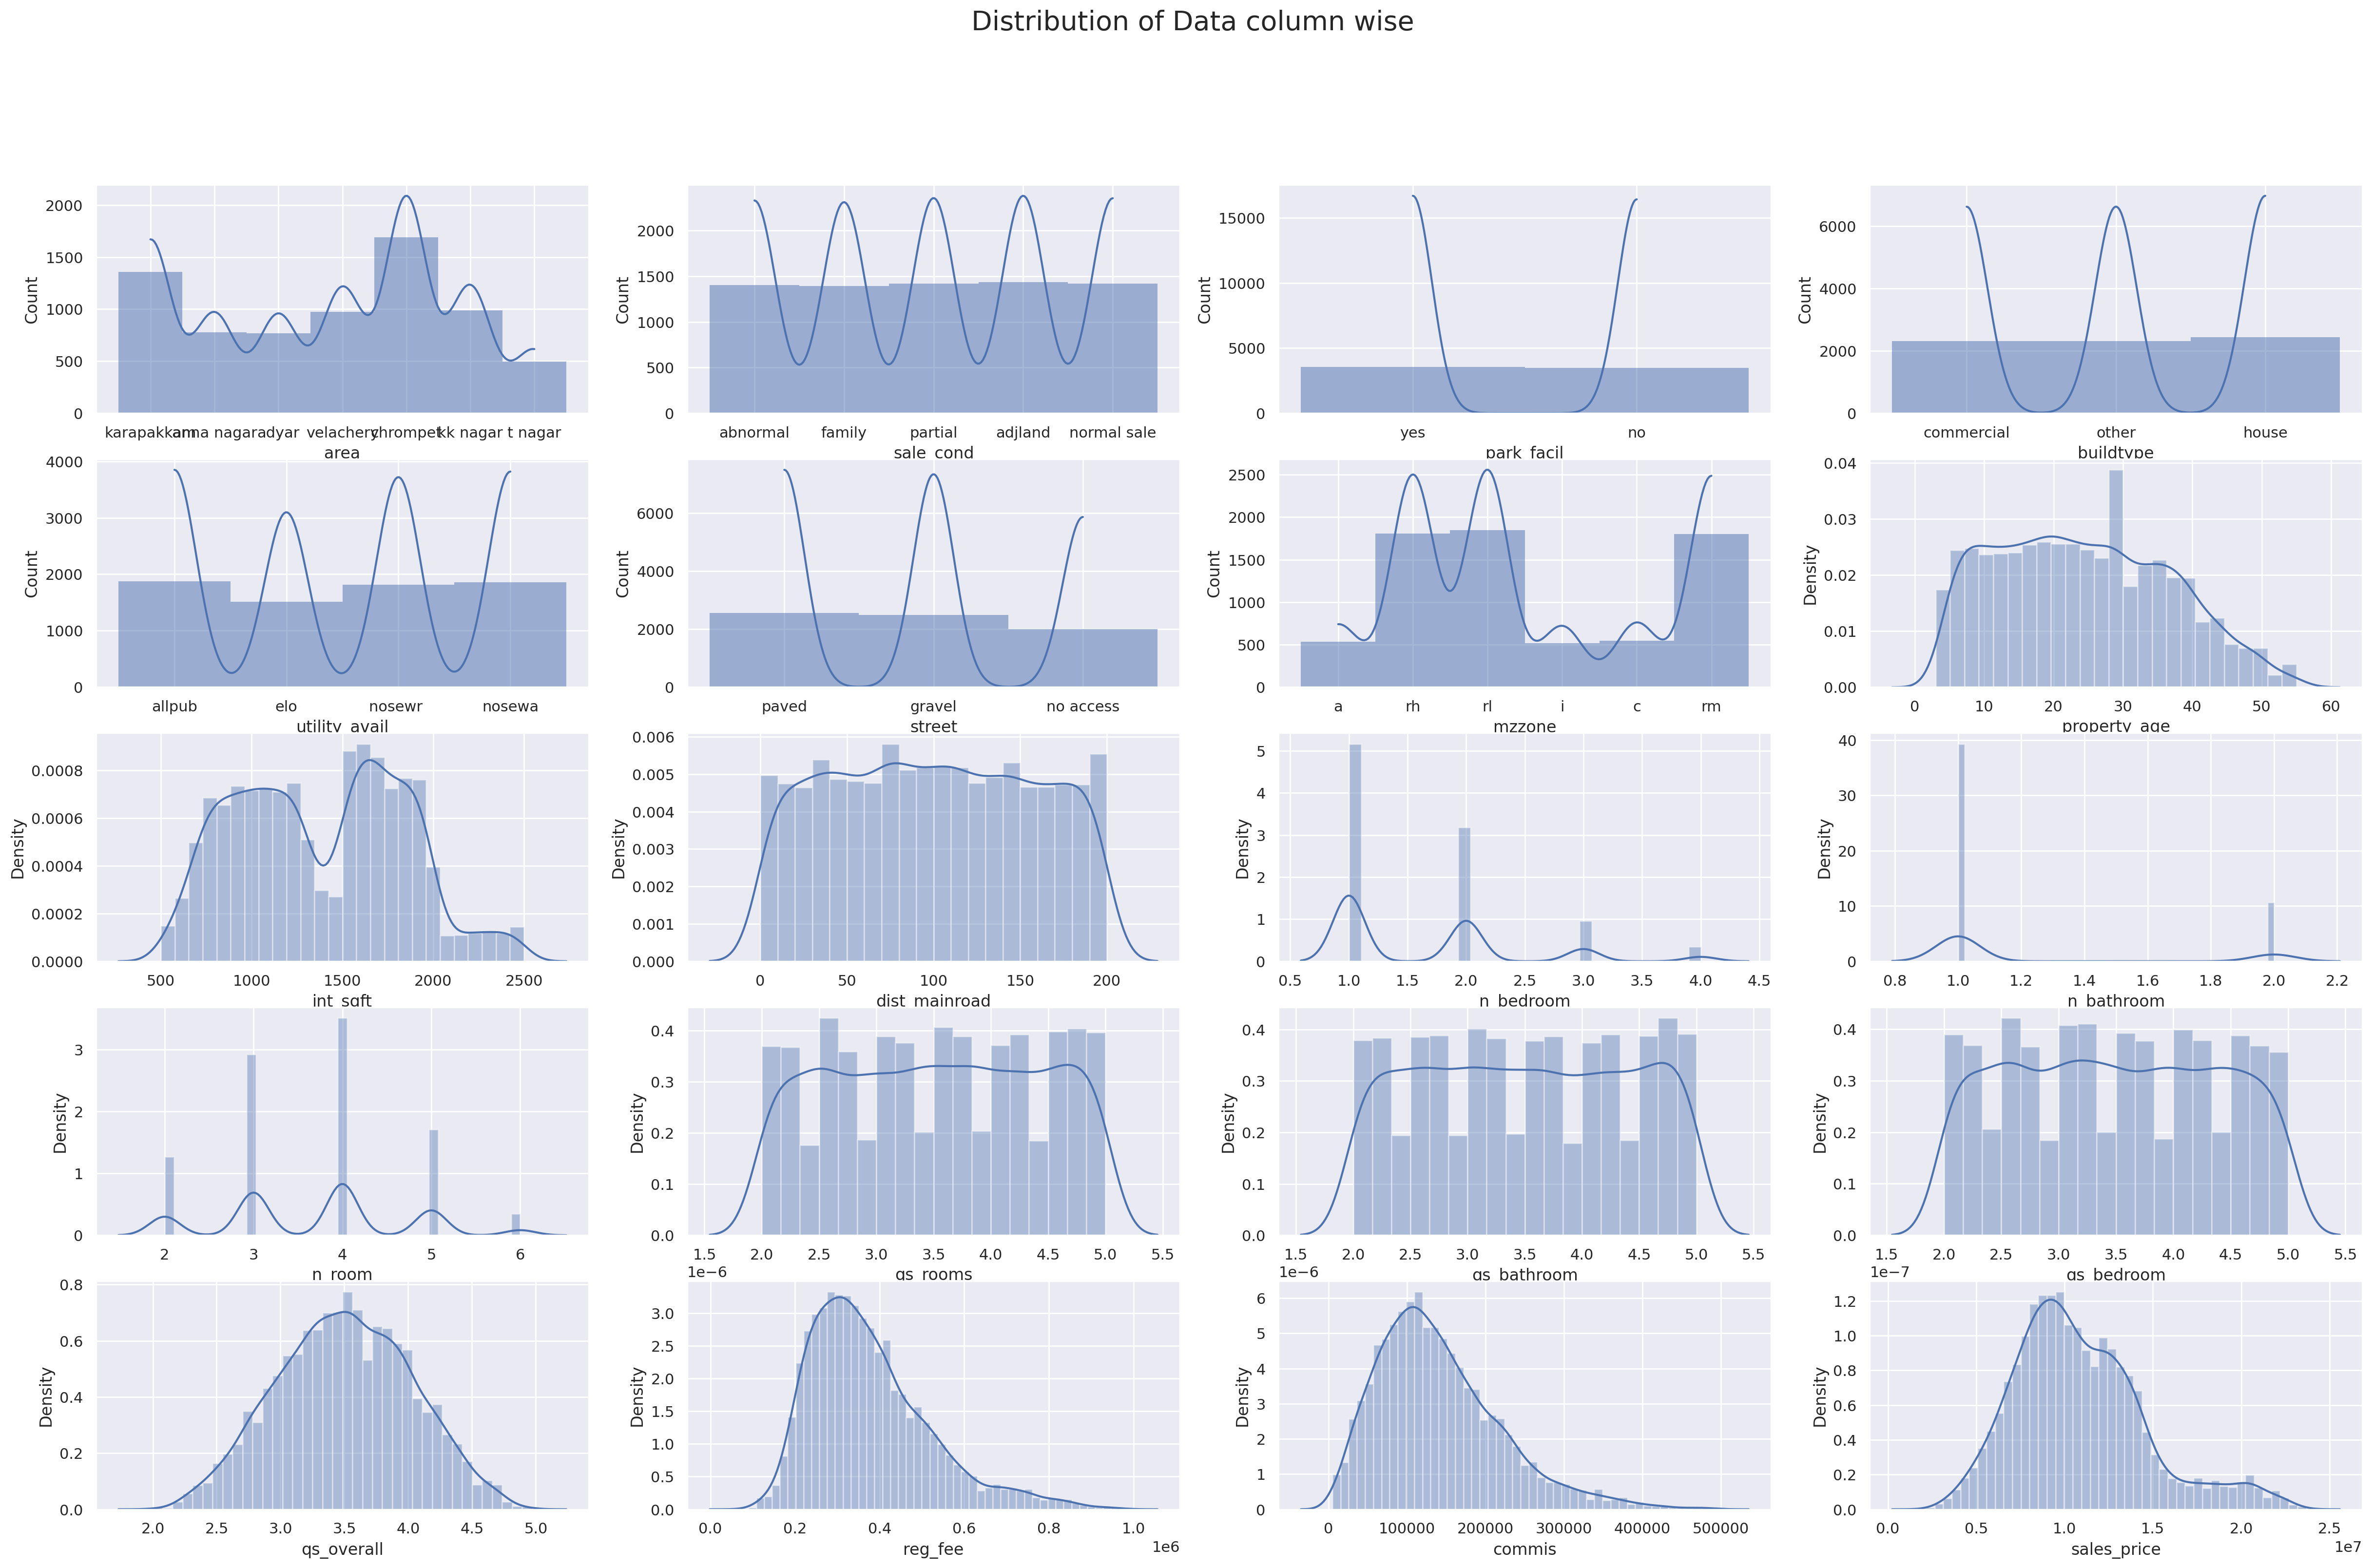

In [ ]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(df.property_age)

plt.subplot(5,4,9)
sns.distplot(df.int_sqft)

plt.subplot(5,4,10)
sns.distplot(df.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(df.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(df.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(df.n_room)

plt.subplot(5,4,14)
sns.distplot(df.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(df.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(df.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(df.qs_overall)

plt.subplot(5,4,18)
sns.distplot(df.reg_fee)

plt.subplot(5,4,19)
sns.distplot(df.commis)

plt.subplot(5,4,20)
sns.distplot(df.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

Interpretation:-

Here as we can see the distribution of data in all the columns are normally distributed in most of the cases and in very few column thd data is very slightly skewed.

# Plotting Features column vs Target column

Here we plot two type of data:

*   Numerical Columns
*   Categorical Columns


Plotting of Numerical data vs Target:
Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.

Here we plot 2 type of numerical data:

1.   Continous numerical variable
2.   Dicsrete numerical variable


Numerical Columns

1.   Continous numerical variable Here we are plotting all our Continous numerical variable columns with total price of the house to figure out, is there any relation between Continous numerical variable features column and total sales.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

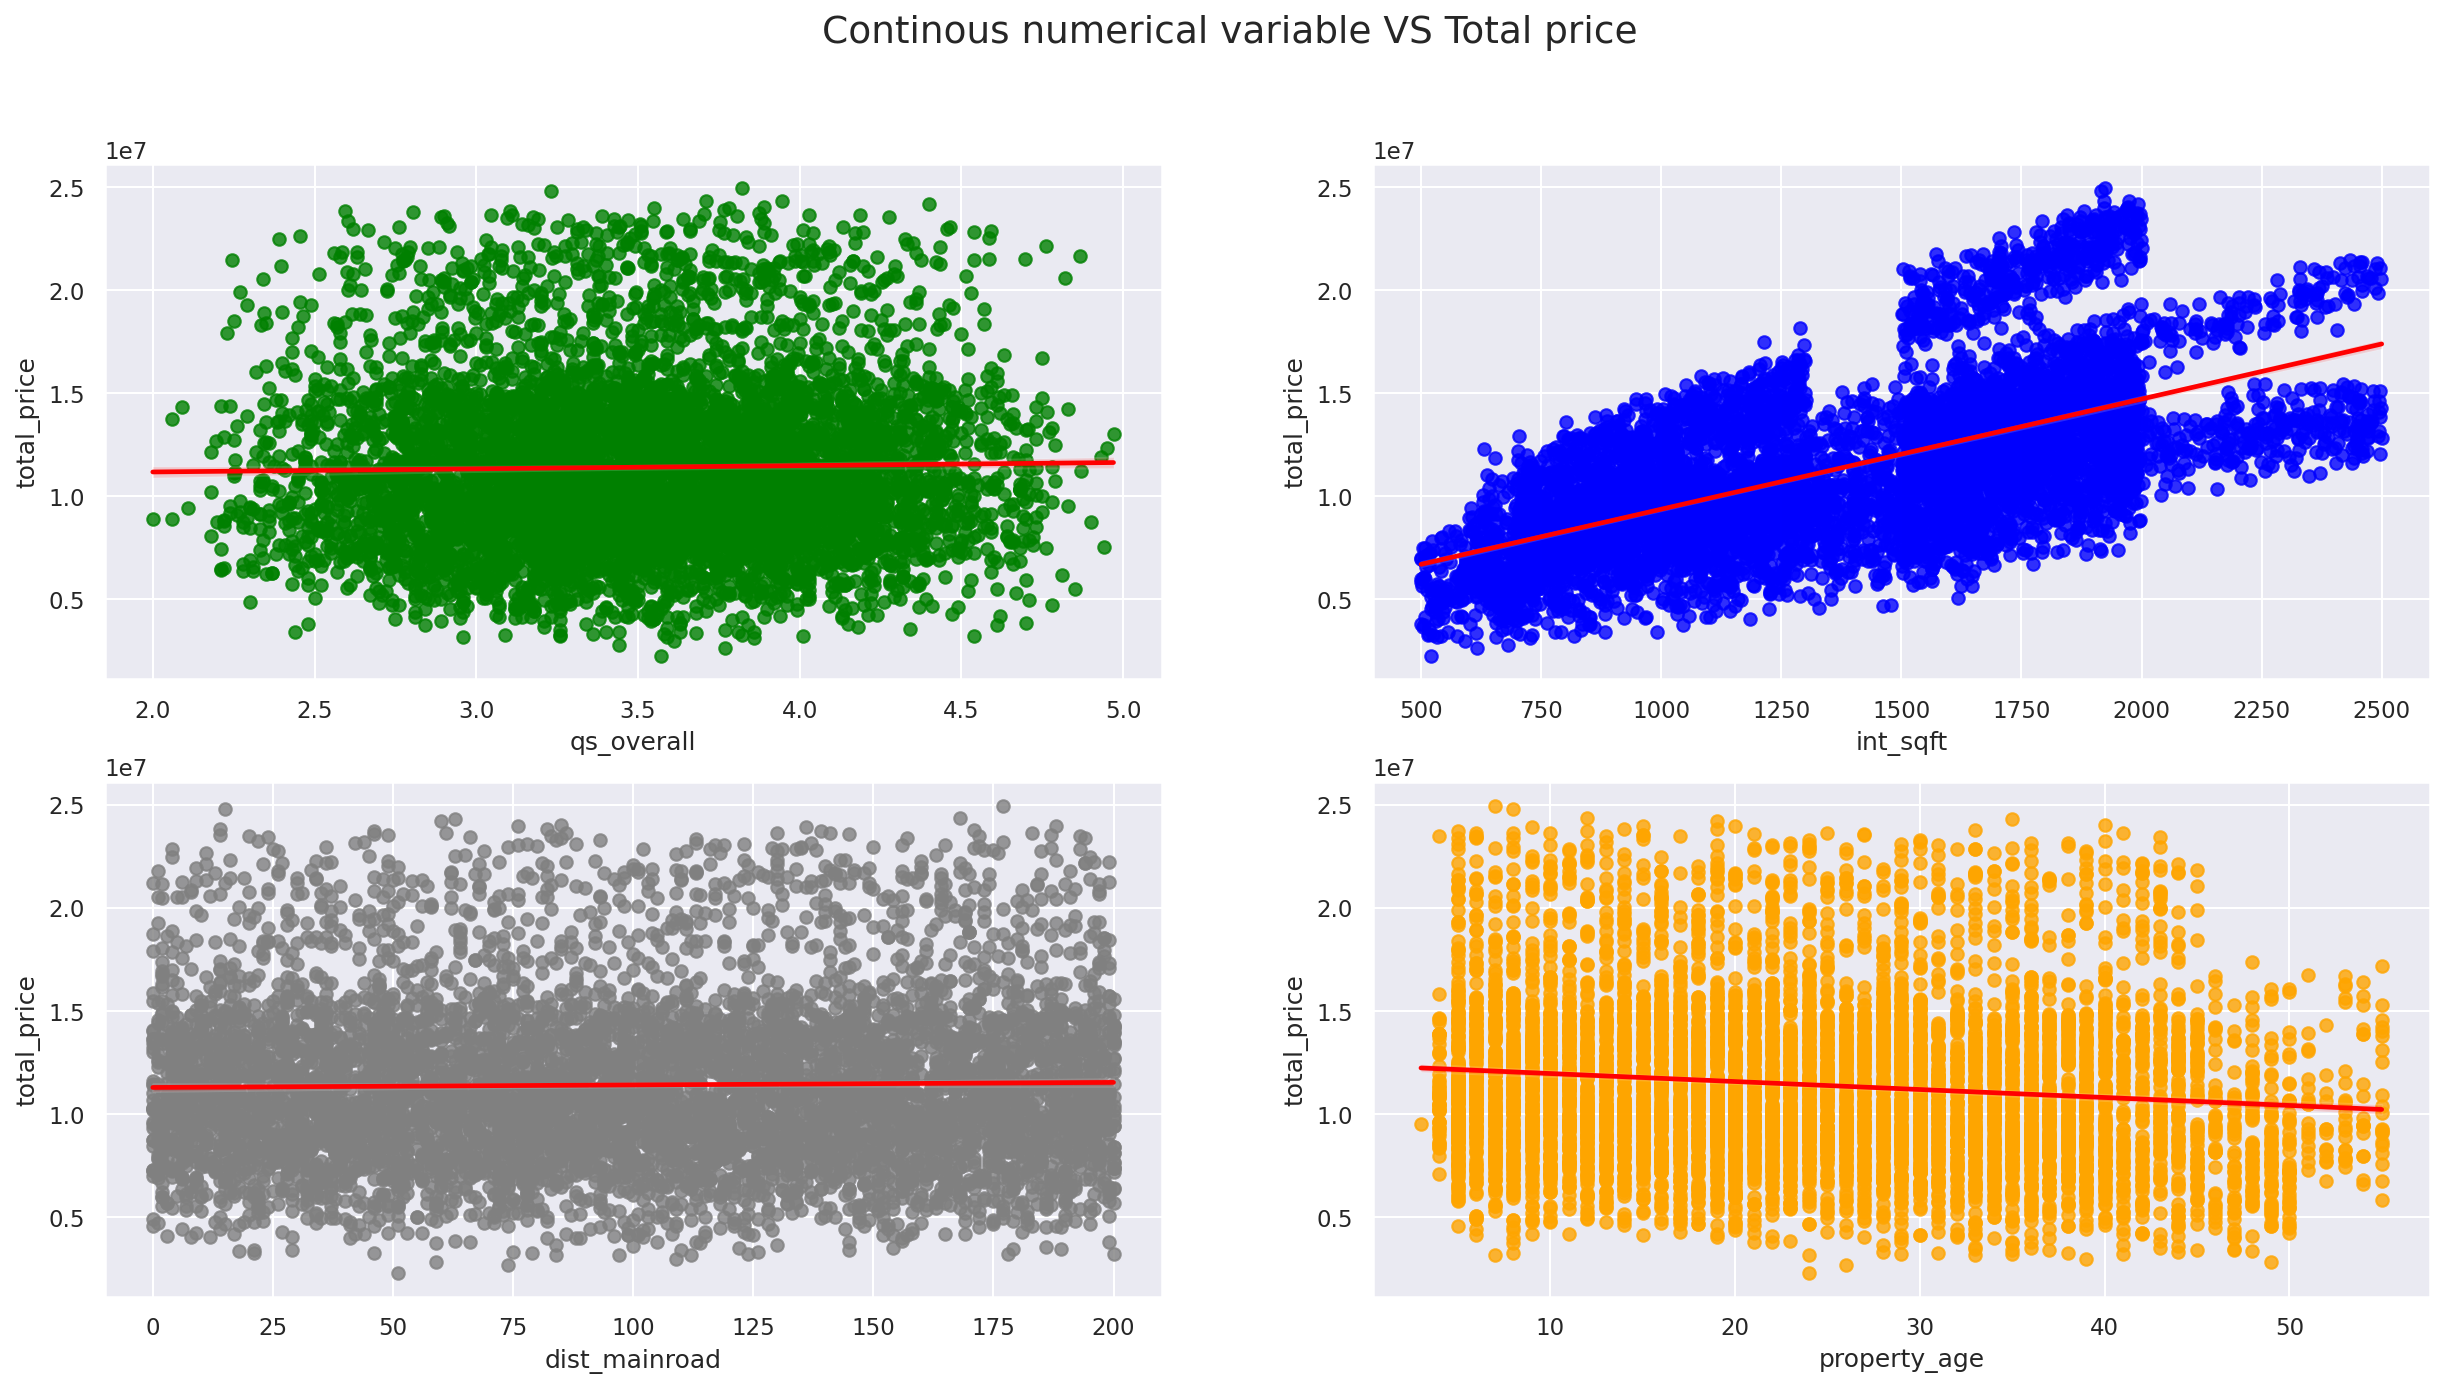

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df.qs_overall, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(df.int_sqft, df.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df.dist_mainroad, df.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(df.property_age, df.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

Interpretation:-

Here we can come to conclusion that:

 
*   In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
* In int_sqft we find good relation so this feature will be very important for us so we will keep it.
*   In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In property_age we find small relation so this feature will be useful for us so we will keep it.





2) Dicsrete numerical variable

Here we are plotting all our Decsrete numerical variable columns with total price of the house to figure out, is there any relation between Decsrete numerical variable features column and total sales.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

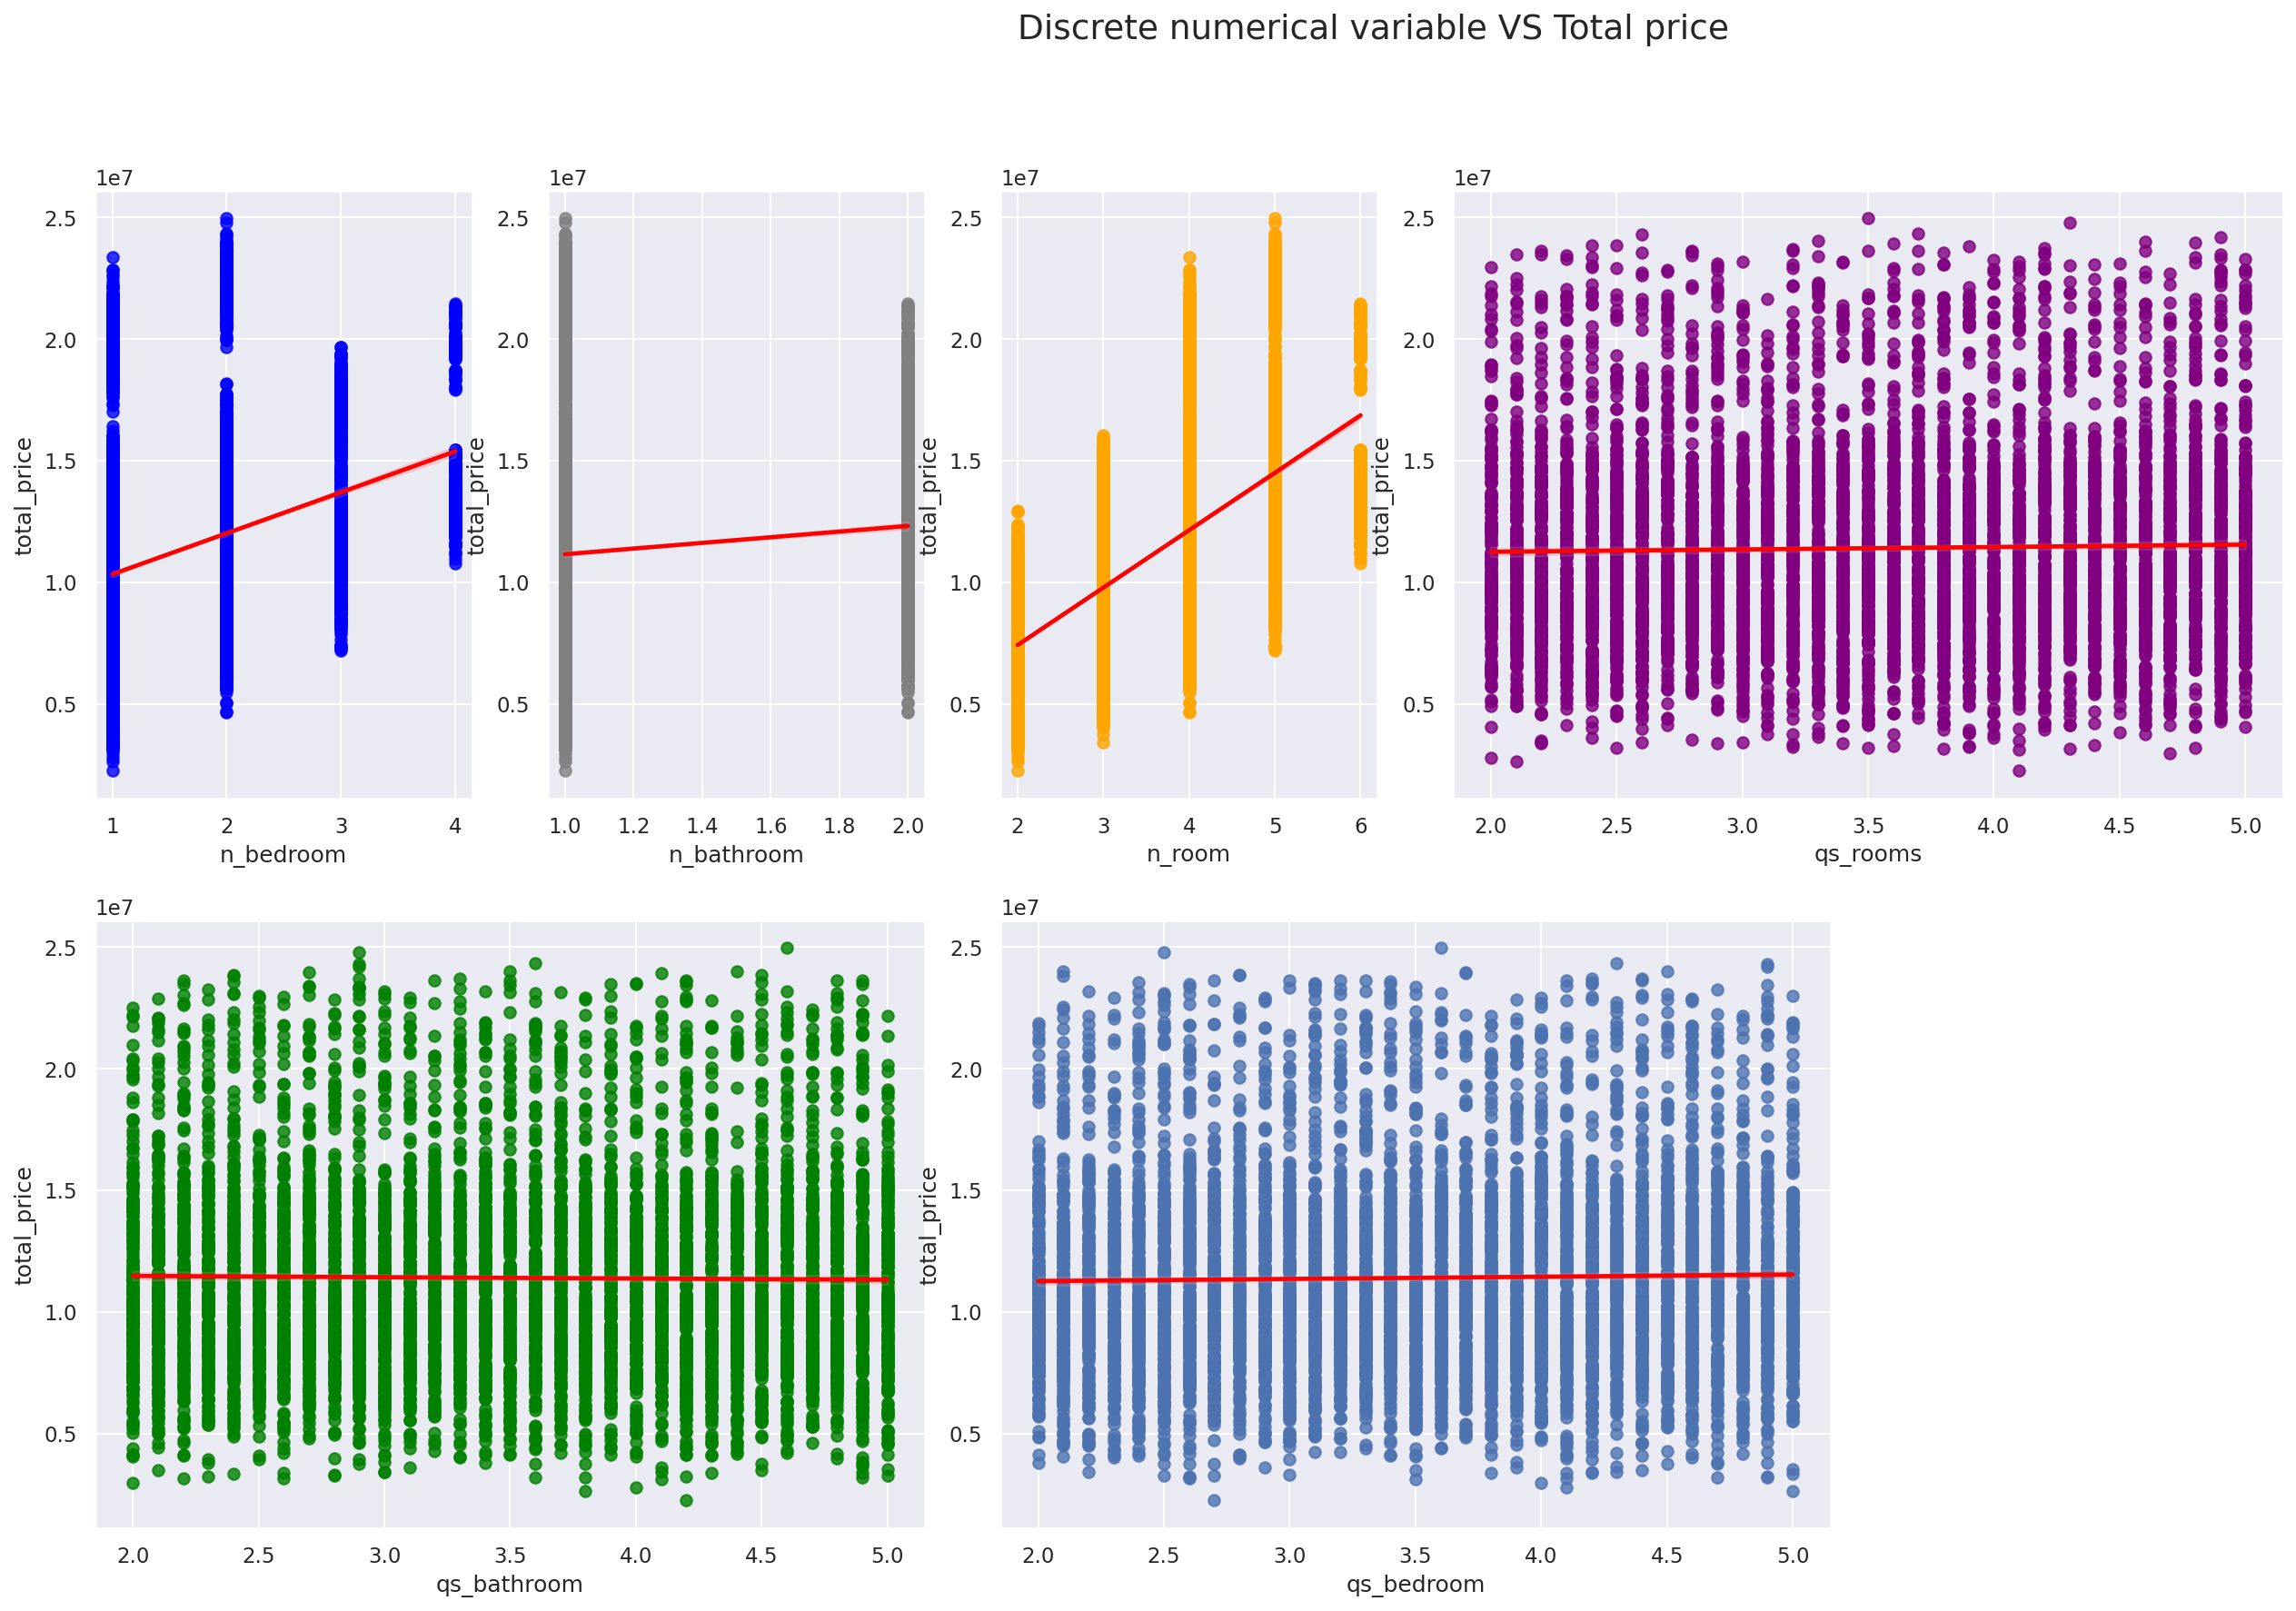

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df.n_bedroom, df.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df.n_bathroom, df.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df.n_room, df.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df.qs_rooms, df.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df.qs_bathroom, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df.qs_bedroom, df.total_price, line_kws={"color": "red"})

plt.suptitle("Discrete numerical variable VS Total price", fontsize=18)
plt.show()


Interpretation:-

Here we can come to conclusion that:

*  In n_bedroom we find good relation so this feature will be very important for us so we will keep it.
*   In n_bathroom we find small relation so this feature will be useful for us so we will keep it.
*   In n_room we find good relation so this feature will be very important for us so we will keep it.
*   In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*  In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.
*   In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.






**Commision and Registration fee columns:**

On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid. Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


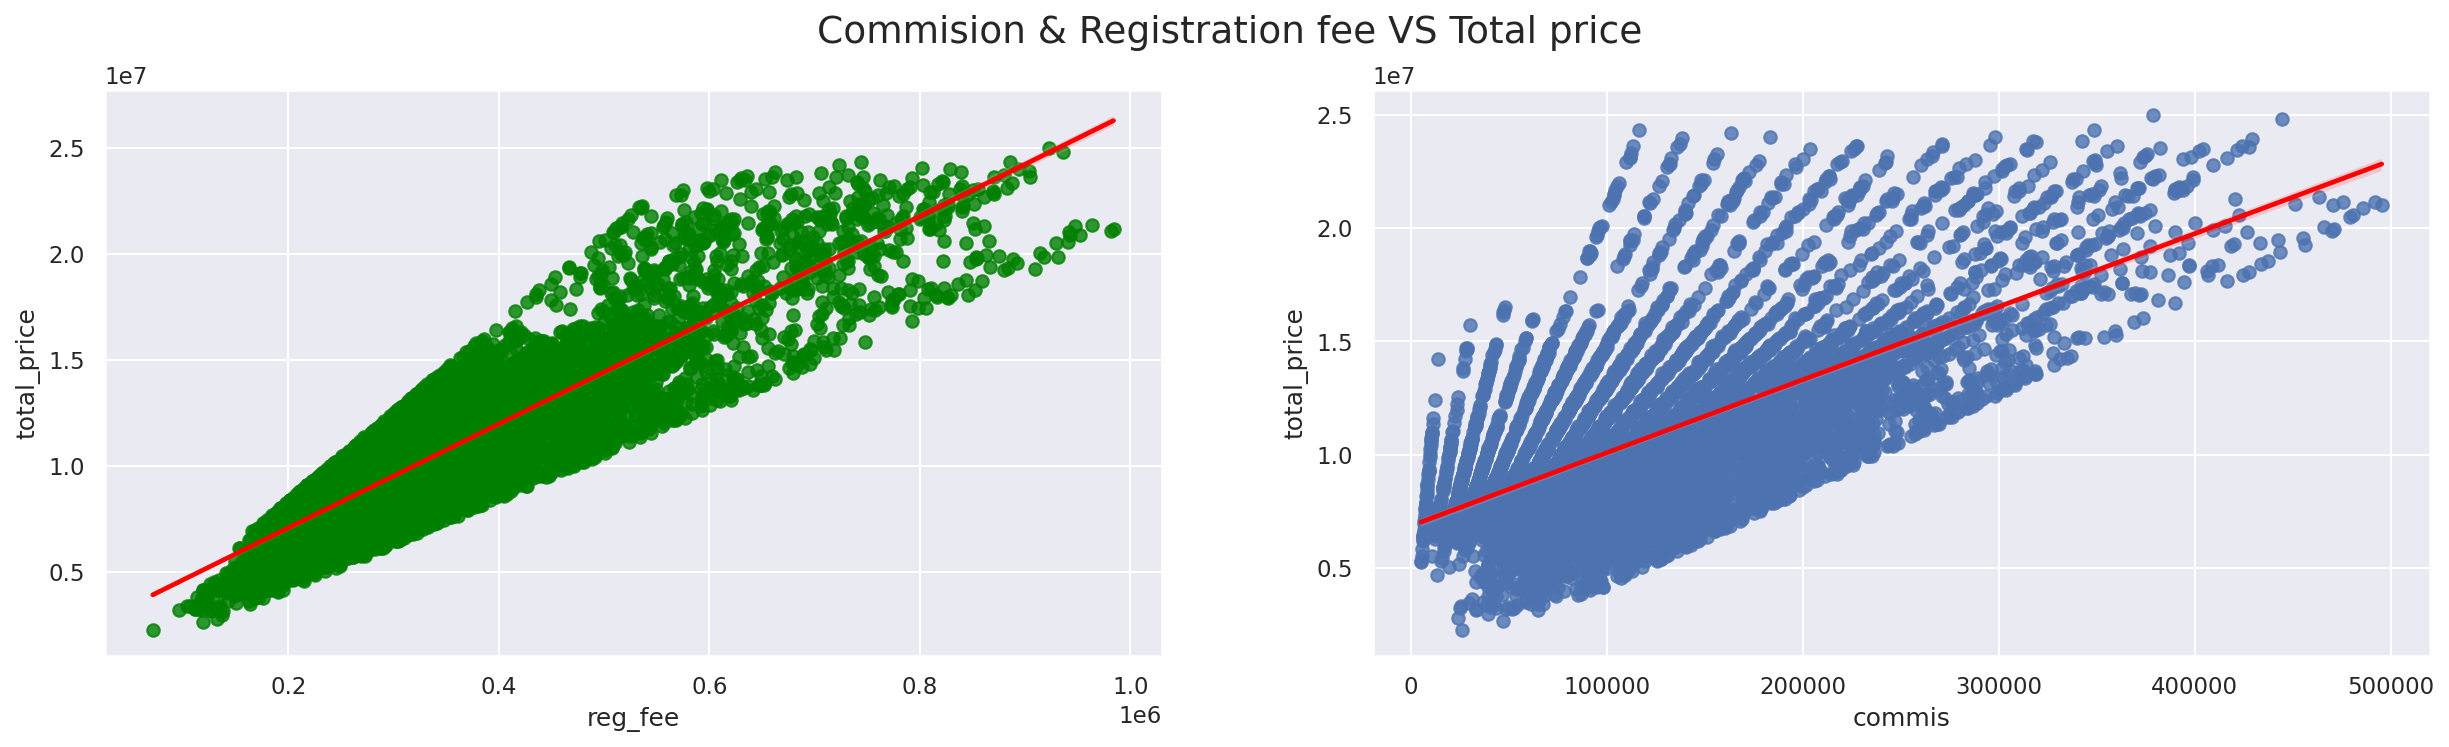

In [ ]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(df.reg_fee, df.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(df.commis, df.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Categorical Columns

Plotting of Categorical data vs Target

Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

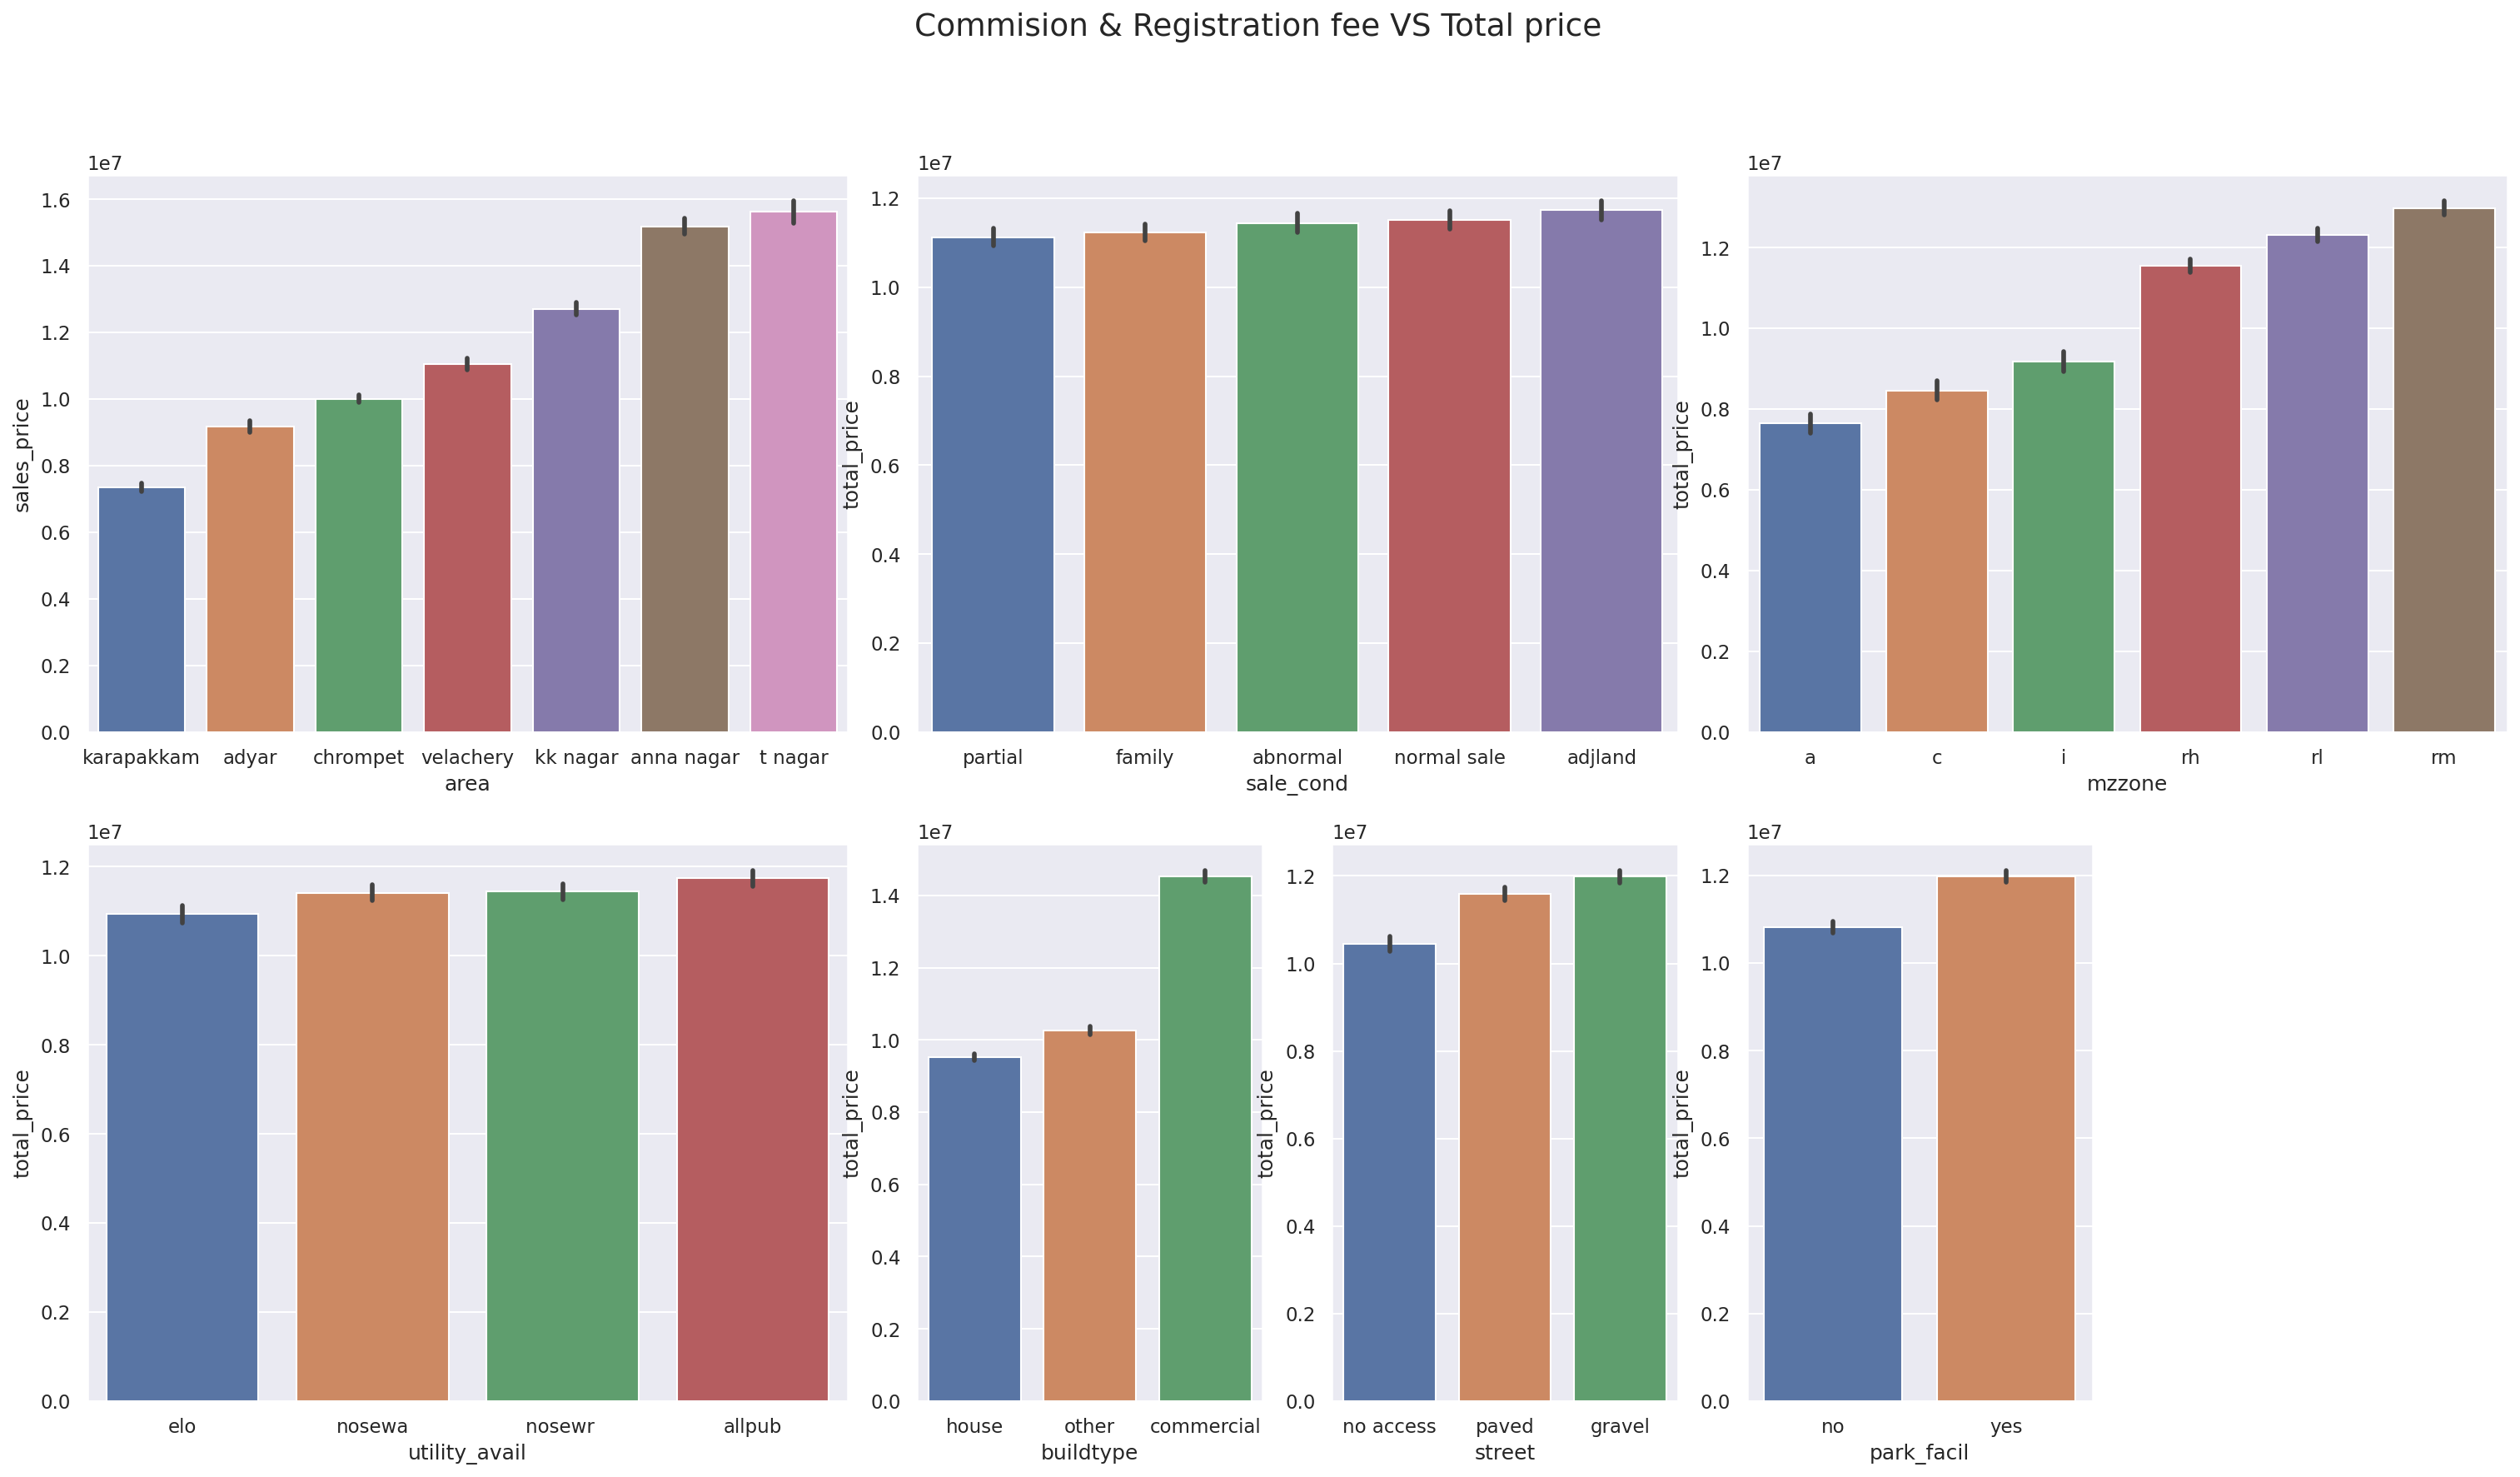

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df.area,y=df.sales_price,order=df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df.sale_cond,y=df.total_price,order=df.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df.mzzone,y=df.total_price,order=df.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df.utility_avail,y=df.total_price,order=df.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df.buildtype,y=df.total_price,order=df.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df.street,y=df.total_price,order=df.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df.park_facil,y=df.total_price,order=df.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Interpretation:-

Here we can come to conclusion that:

*   In area when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

*   In sale_cond when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

*   In mzzone when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.
*  In utility_avain when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

*   In buildtype when we sort column in respect of total_price we didn't find linear relation in this categorical feature but it may beimportant for us so we will keep it and do OneHotEncoding on this column data.

*  In street when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

*   In park_facil when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.








**Encoding**

From here onwards encoding of data will start in for categorical data in sequential manner in numerical so that computer can understand those data columns.

**OneHotEncoder**

Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. But to be simple we have just used get_dummies feature from pandas.

In [ ]:
df = pd.get_dummies(df,columns=['buildtype'])

**Label Encoder (Mapping)**

Here we are encoding ordinal categorical columns which have some order present in them and we have to preserve the order so here we use Label/Ordinal encoder. So, for simplicity i have just simply mapped the values in order of the data.

In [ ]:
# Encoding the area column order-wise 
df.area = df.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
df.sale_cond = df.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
df.park_facil = df.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
df.utility_avail = df.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                       
# Encoding the street column order-wise 
df.street = df.street.map({'no access' : 1,
                           'paved' : 2, 
                            'gravel' : 3})

# Encoding the mzzone column order-wise 
df.mzzone = df.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})

In [ ]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
df = df.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

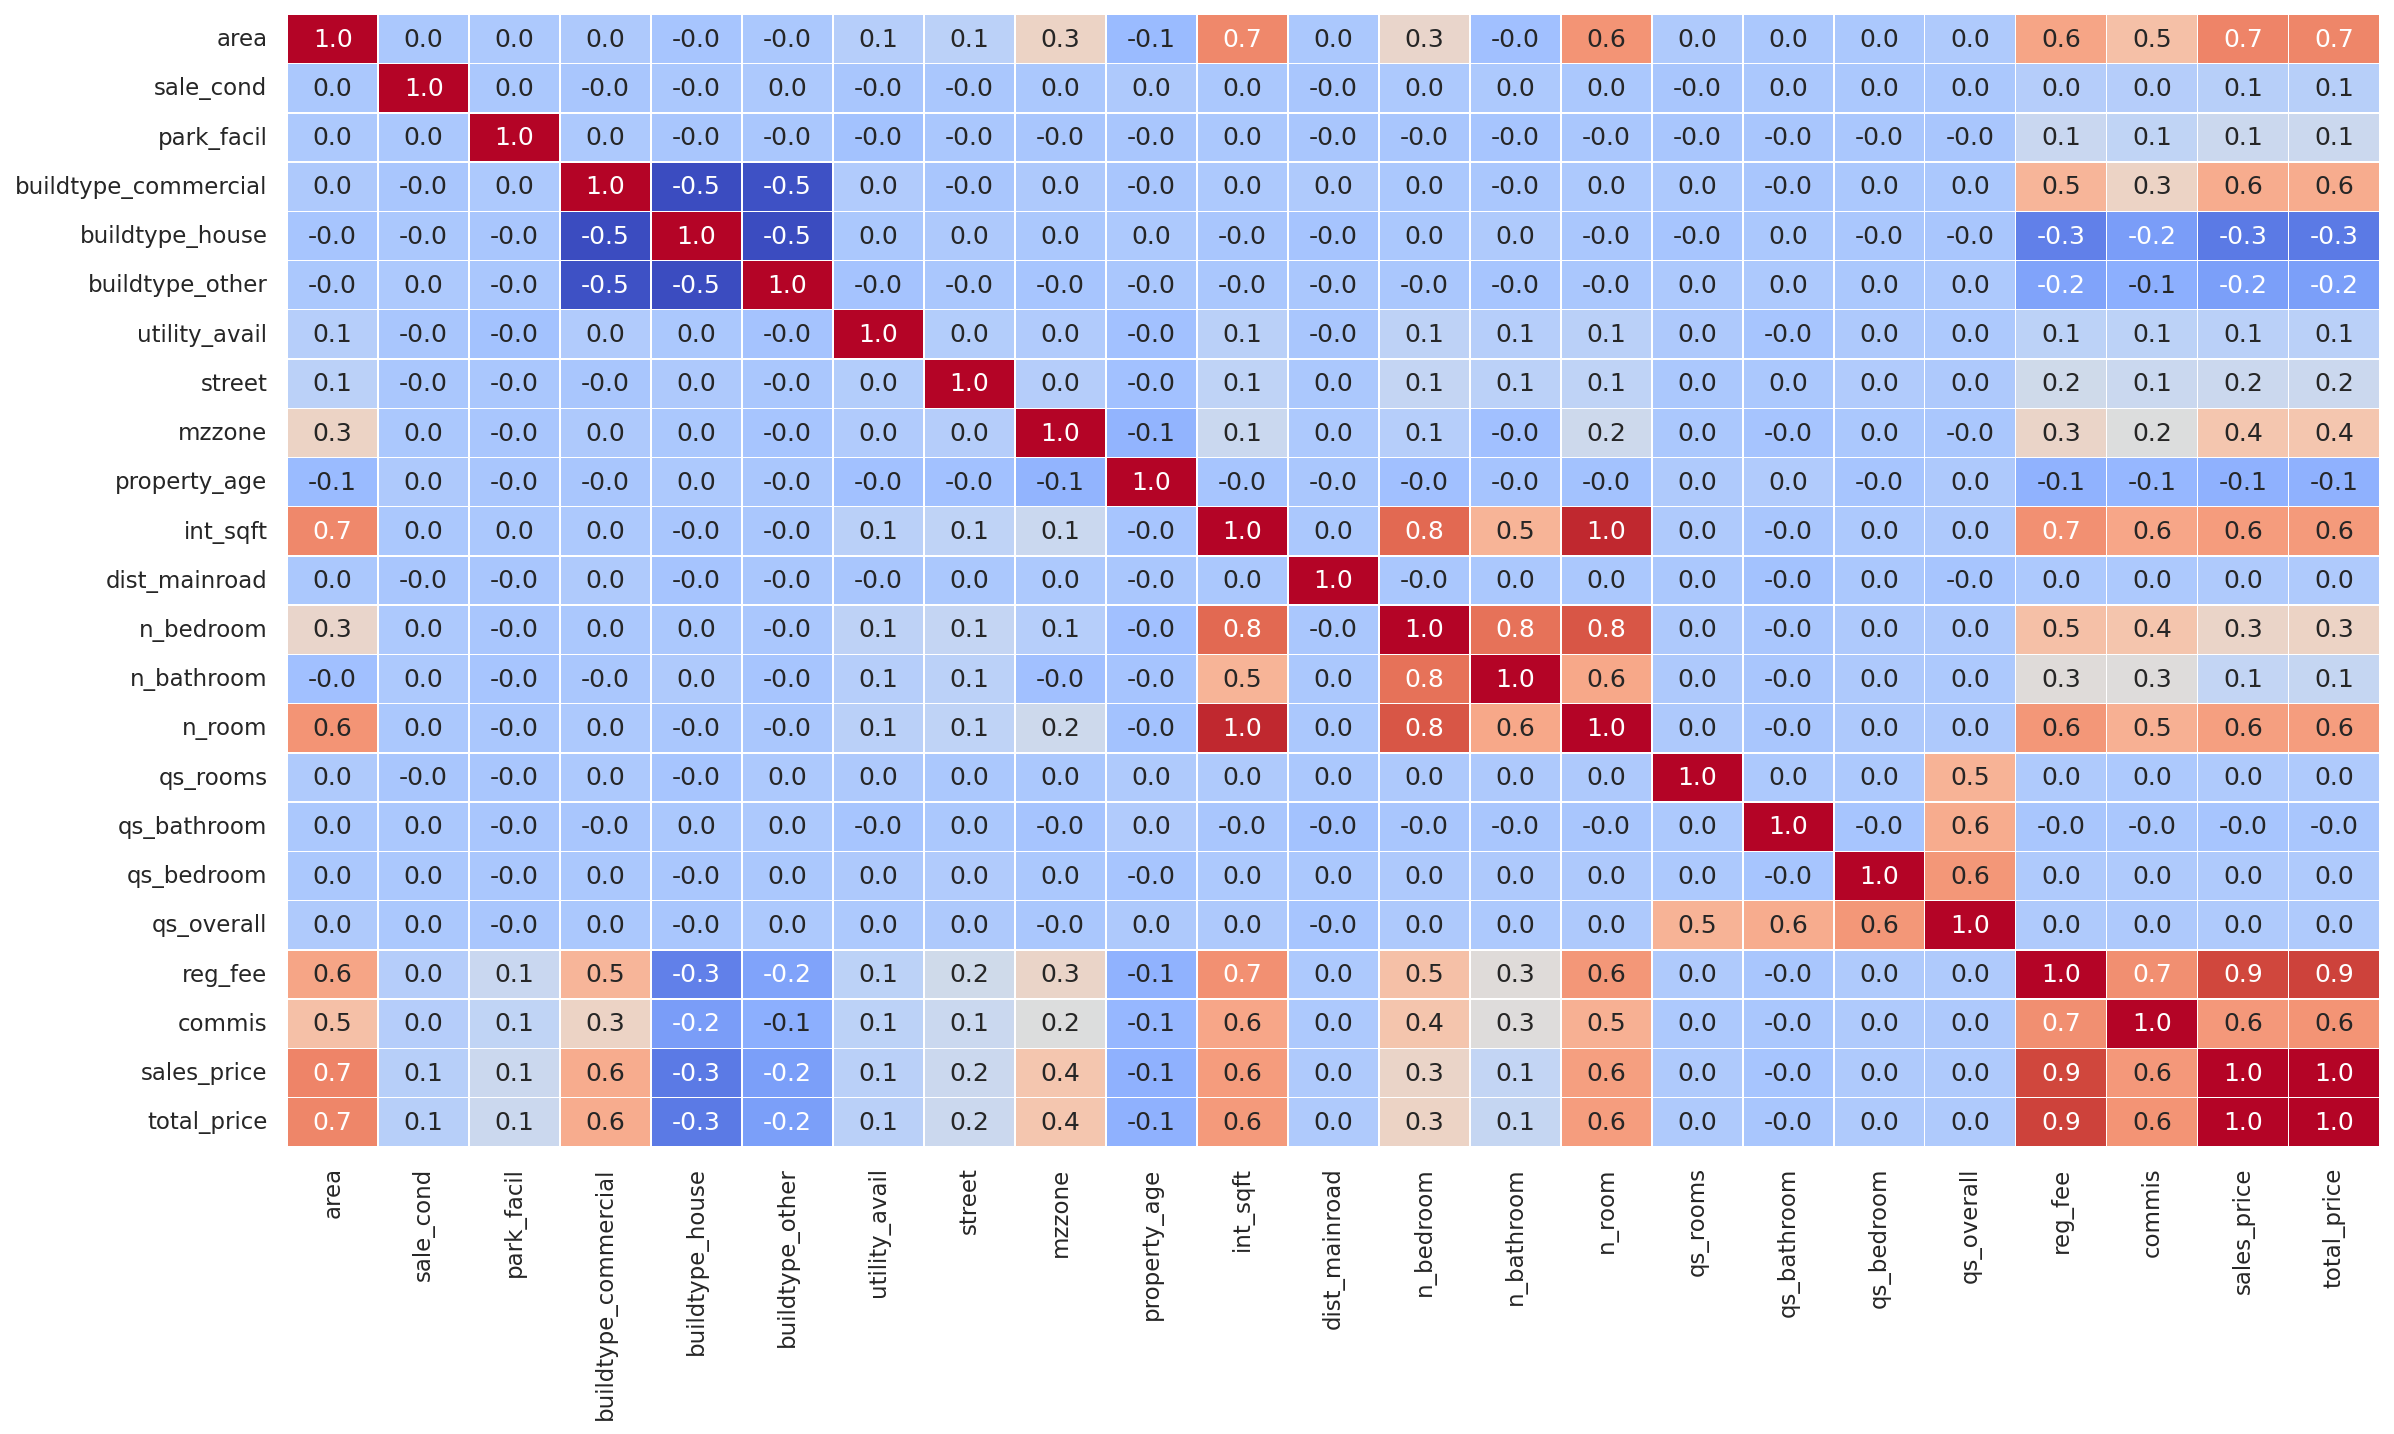

In [ ]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Interpretation:-

Here after encoding all columns we can see that in categorical columns also there are some correlation between target and features as we can there is a very good correlation between some columns of our data which are soon in reddish colour.

In [ ]:
df.head(5)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   
3     4          2           0                     0                0   
4     1          3           1                     0                0   

   buildtype_other  utility_avail  street  mzzone  property_age  ...  \
0                0              4       2       1            44  ...   
1                0              4       3       4            11  ...   
2                0              1       3       5            20  ...   
3                1              3       2       3            22  ...   
4                1              4       3       2            30  ...   

   n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0           1       3       4.0          3.9         4.9       4.330   380000   
1           1       5       4.9          4.2         2.5       3.765   760122   
2           1       3       4.1          3.8         2.2       3.090   421094   
3           2       5       4.7          3.9         3.6       4.010   356321   
4           1       3       3.0          2.5         4.1       3.290   237000   

   commis  sales_price  total_price  
0  144400      7600000      8124400  
1  304049     21717770     22781941  
2   92114     13159200     13672408  
3   77042      9630290     10063653  
4   74063      7406250      7717313  

[5 rows x 23 columns]

In [ ]:
# Removing unnecessary features thich has negligible relation with total_price
df1 = df.copy()
df1.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [ ]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df1[input_cols].copy()
target = df1[target_cols].copy()
target1 = df1[target1_cols].copy()

**Splitting the data for training and testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

**SCALLING**

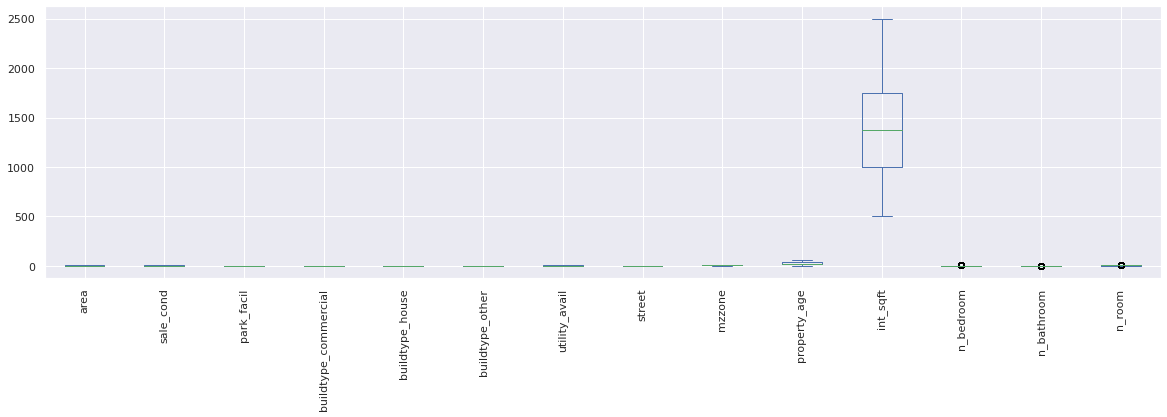

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

Interpretation:-

Here we can clearly see in our features column int_sqft is the only feature which which contains very large value and all the remaining of the feature column are pretty small.

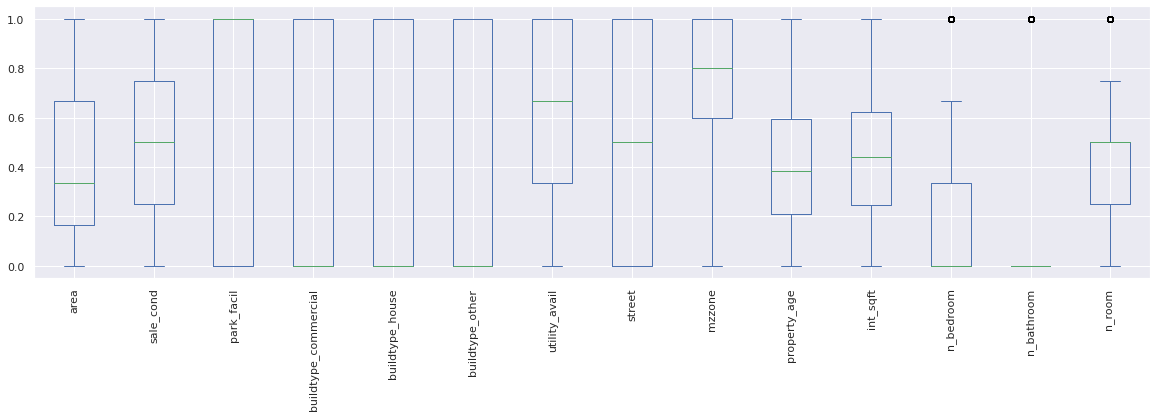

In [ ]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

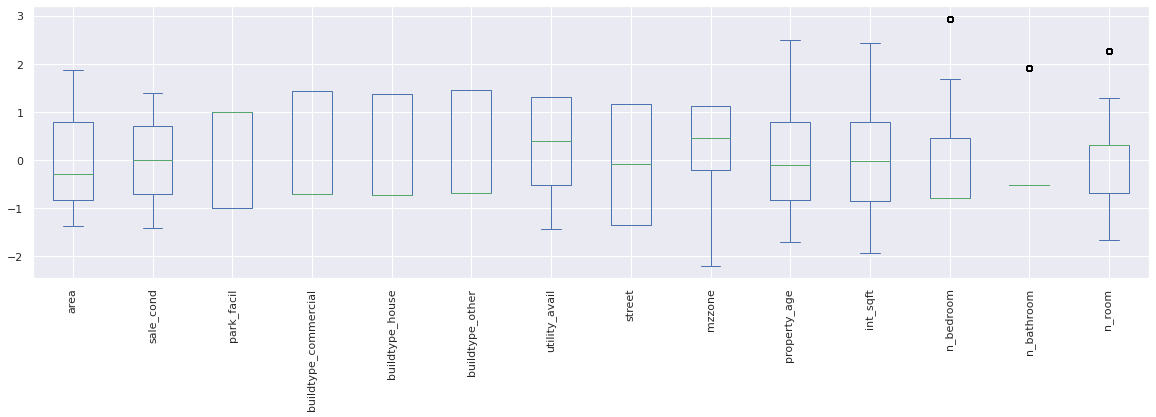

In [ ]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

Interpretation:-

Here with the help of MinMaxScaler and StandardScaler we are trying to scale the data so that the spread of values between all the features become equal so that the model which train the data by using distace distance doesn't get very large values as their features.

### **Model Training**

From here on we will start building model on top of data which we have prepared till now and we will try all different kind of machine learning models and try to get best r-square score for all 3 type of data that are normaldata, MinMaxScaled data and StandardScaler data.

## **Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.923424259980204
R2- SCORE(Standardscaler): 0.9235956445666523
R2- SCORE(Minmaxscaled): 0.9234463807033615


## K-NearestNeighbor

Orange and Blue depict RSME for MinMaxScaler and blue


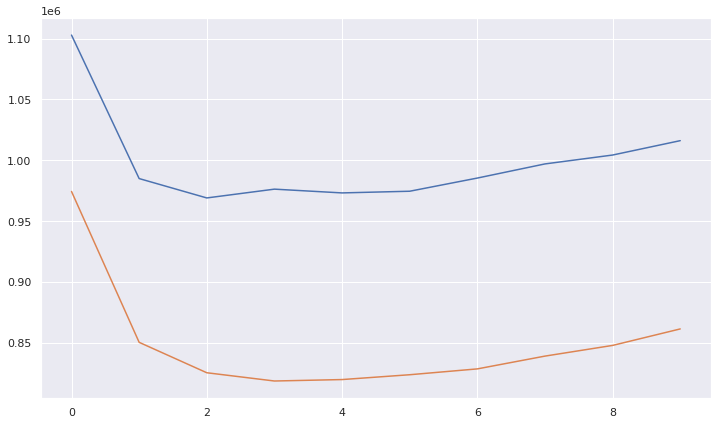

In [ ]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.43309895459186276
R2- SCORE(Minmaxscaled): 0.9338292932490762
R2- SCORE(Standardscaler): 0.9527770963012473


## **DECISION TREE**

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9757956667279886
R2- SCORE(Minmaxscaled): 0.9752914666026423
R2- SCORE(Standardscaler): 0.9743382690700336


## **Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9871139474881858
R2- SCORE(minmaxscaled): 0.9871232389401193
R2- SCORE(Standardscaler): 0.986860464141313


## **XG Boost**

In [ ]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9967270044068283  Test score :  0.9961621441920422
Learning rate :  0.5  Train score :  0.9977452756031117  Test score :  0.9970817256045346
Learning rate :  0.7  Train score :  0.9983913785754902  Test score :  0.9976933662773312
Learning rate :  0.8  Train score :  0.997939920648442  Test score :  0.9964788933275089
Learning rate :  1  Train score :  0.9978139598852349  Test score :  0.996720315945207


In [ ]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9976933662773312
R2- SCORE(MinMaxScaler): 0.9976933662773312
R2- SCORE(Standardscaler): 0.9976917294994156


Interpretation:-

Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that XGBRegressor outperformed most of the machine learning model and gives 0.997693 as R2-score. The results of all the models trained in this project is mentioned below:

*   XGBRegressor gives score of 0.997693 as R2-score.
*   RandomForestRegressor gives score of 0.9867256 as R2-score.
*   LinearRegression gives score of 0.923446 as R2-score.
*   KNeighborsRegressor gives score of 0.952777 as R2-score.
*   RandomForestRegressor gives score of 0.9867256 as R2-score.








CONCLUSION

Through this Machine Learning project we can conclude that there are so many aspects of training machine learning model, first we have to clean the data and try to get all the features in a suitable format. There are many variables and features which which play their part in setting the price of the house in this particular dataset so we have to keep all the columns or features into consideration while training the model, we should focus as much as possible on exploratory data analysis and try to find the pattern in categorical data also in numerical data we can find pattern through various Matrix but in categorical data we have to get enough time to find a relation between two variables that there is no linear relation then we can try to transform the data but here that was not the case after that we encoded our categorical column in order for ordinal data and by one hot encoder for nominal data and removed all the columns which have no relation with target columns. After that it comes the training the machine learning model part and here we train data with as many model as possible and try to get the best possible RS Square score as we can and at the end we finalise a model with highest RS Square score for this data which gave score of more than 99% (99.769% to be exact).